In [10]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
data.head(5)
mini = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/mini.csv')

HTTPError: HTTP Error 404: Not Found

In [6]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Drop missing values from embarked
titanic = data.dropna()

# Let's treat Pclass as categorical
titanic['Pclass_cat'] = titanic['campaign'].astype('category')

# Encode our features and target as needed
features = ['Pclass_cat', 'job', 'marital', 'education']
X = pd.get_dummies(titanic[features], drop_first=True)
y = titanic['y']

# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Build the decision tree
clf = DecisionTreeClassifier()

# Train it
clf.fit(X_train, y_train)

# Test it
clf.score(X_test, y_test)

0.8834637172916104

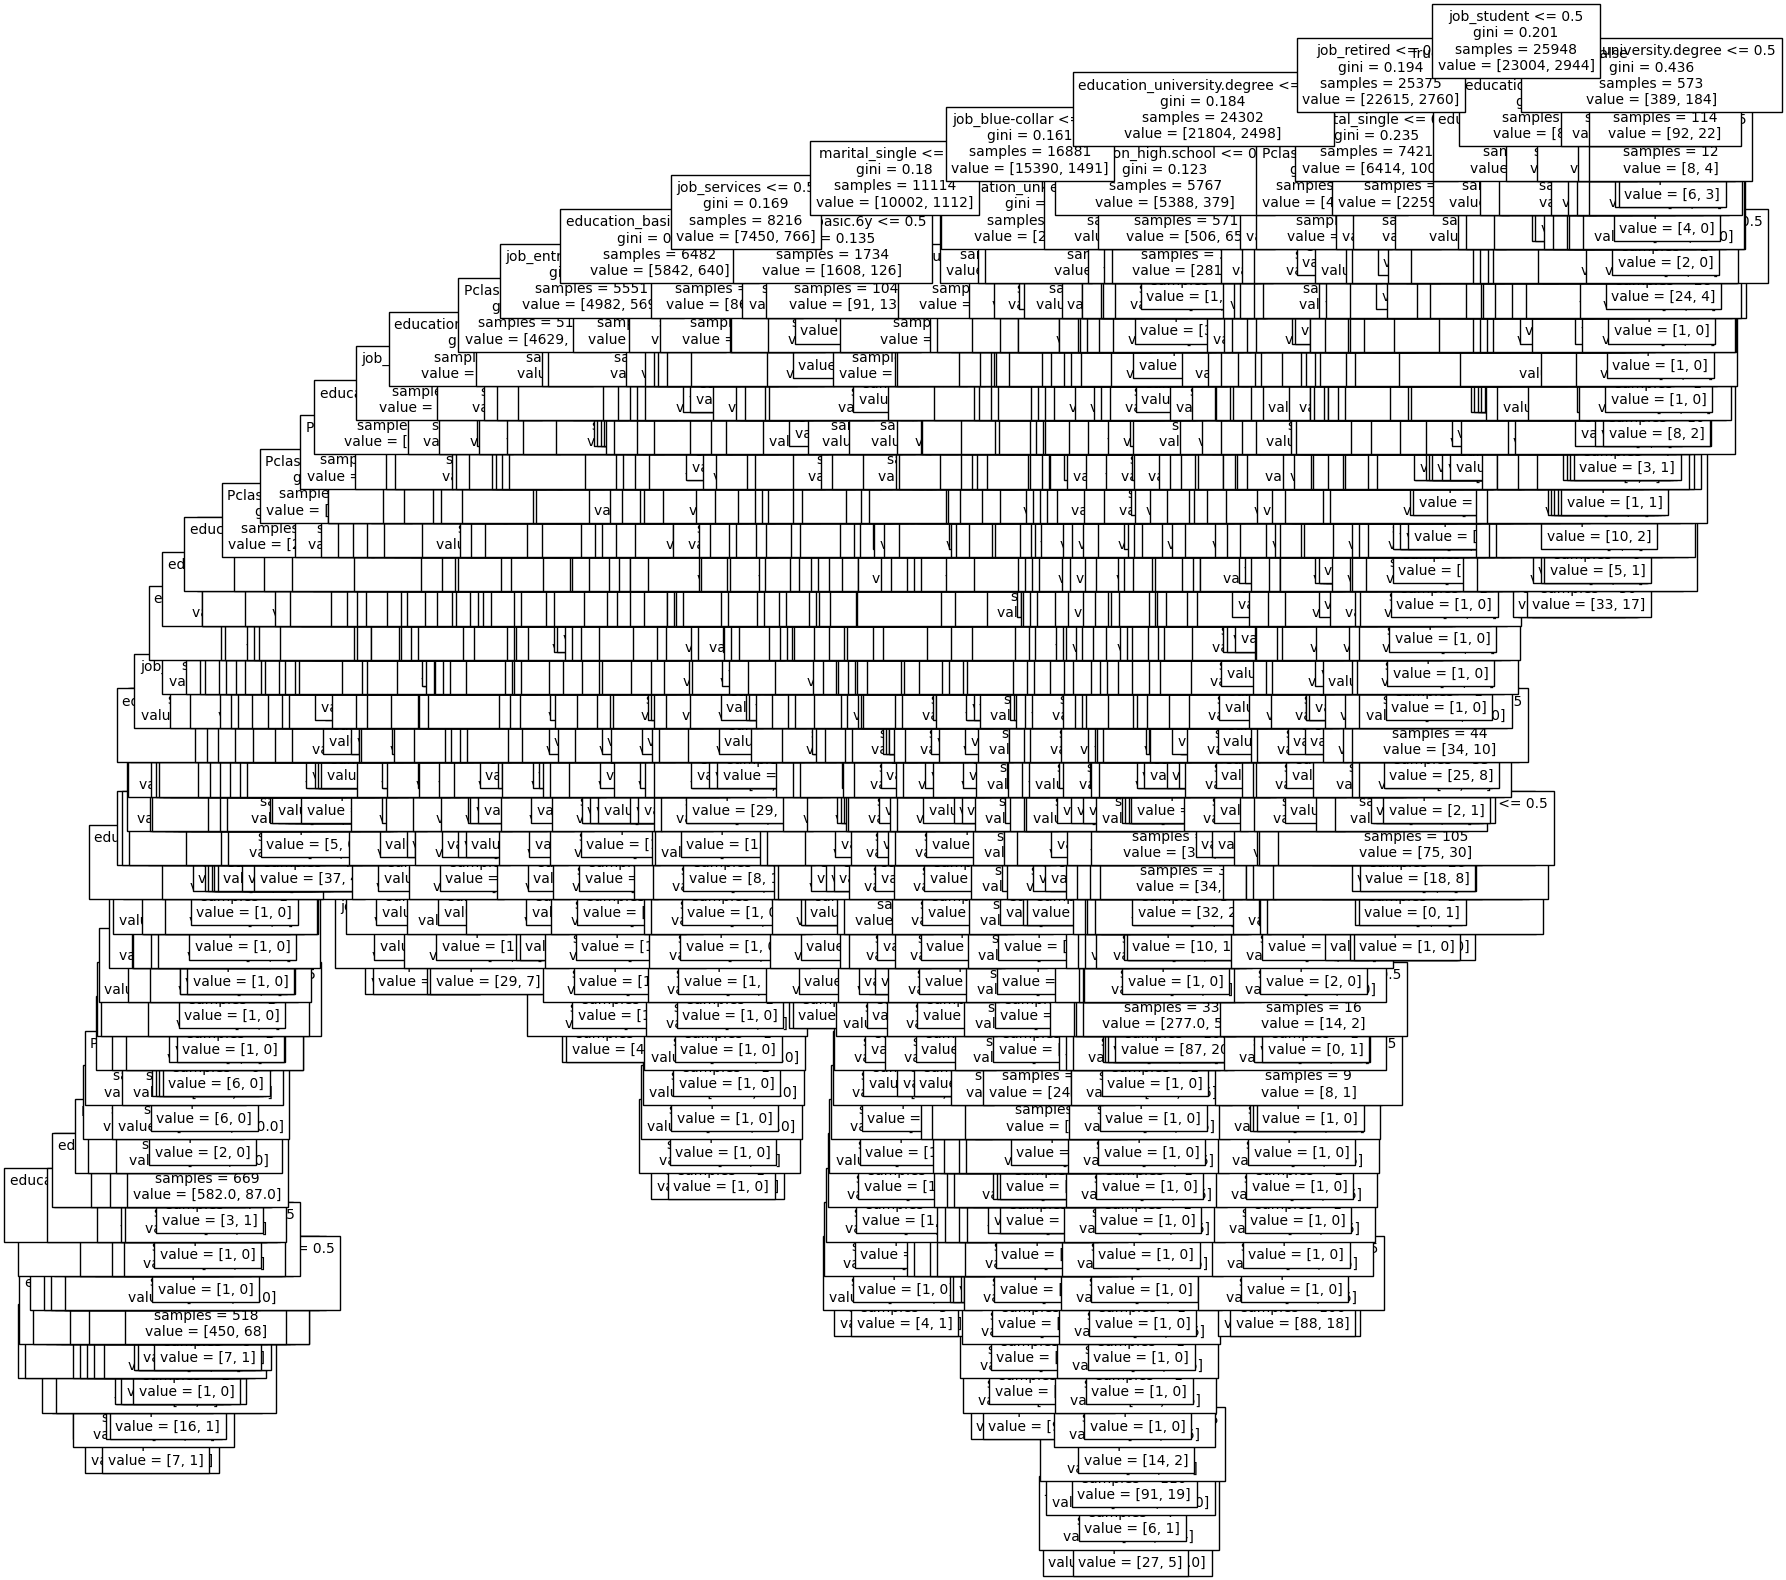

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.show()

In [11]:
new_data = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv')

# Drop missing values (if necessary)
new_data = new_data.dropna()

# Convert 'campaign' to categorical for consistency
new_data['Pclass_cat'] = new_data['campaign'].astype('category')

# Ensure the new dataset has the same features as the training set
# Use the same feature list and one-hot encoding
new_X = pd.get_dummies(new_data[features])
new_X = new_X.reindex(columns=X.columns, fill_value=0)

# Make predictions on the new dataset
new_predictions = clf.predict(new_X)

# Evaluate the model on the new dataset if ground truth is available
if 'y' in new_data.columns:
    new_y = (new_data['y'] == 'yes').astype(int)  # Convert target to binary (if necessary)
    accuracy = accuracy_score(new_y, new_predictions)
    report = classification_report(new_y, new_predictions)
    print(f"Accuracy on new dataset: {accuracy:.2f}")
    print("\nClassification Report:\n", report)
else:
    print("Predictions on new dataset:")
    print(new_predictions)


Predictions on new dataset:
['no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'